In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-30 06:05:35--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  34.6MB/s    in 9.8s    

2020-07-30 06:05:45 (31.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Ekstrak file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['paper',
 'train',
 'scissors',
 'rps-cv-images',
 'rock',
 'val',
 'README_rpc-cv-images.txt']

In [ ]:
#Menghilangkan README
os.remove('/tmp/rockpaperscissors/README_rpc-cv-images.txt')

In [ ]:
pip install split_folders

In [ ]:
#Split Folders
import split_folders
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
split_folders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed=1337, ratio = (0.60, 0.40))
train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 3760.50 files/s]


In [ ]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [ ]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_rock_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_rock_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
#Augmentasi Gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#Arsitektur CNN
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#Loss Function dan Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#Data Training
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 42s - loss: 0.0188 - accuracy: 0.9950 - val_loss: 0.2131 - val_accuracy: 0.9438
Epoch 2/20
25/25 - 42s - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.1586 - val_accuracy: 0.9500
Epoch 3/20
25/25 - 42s - loss: 0.0155 - accuracy: 0.9937 - val_loss: 0.0354 - val_accuracy: 0.9812
Epoch 4/20
25/25 - 43s - loss: 0.0422 - accuracy: 0.9837 - val_loss: 0.0808 - val_accuracy: 0.9688
Epoch 5/20
25/25 - 42s - loss: 0.0159 - accuracy: 0.9962 - val_loss: 0.1201 - val_accuracy: 0.9563
Epoch 6/20
25/25 - 42s - loss: 0.0491 - accuracy: 0.9837 - val_loss: 0.1062 - val_accuracy: 0.9750
Epoch 7/20
25/25 - 42s - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.1037 - val_accuracy: 0.9812
Epoch 8/20
25/25 - 45s - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.1084 - val_accuracy: 0.9750
Epoch 9/20
25/25 - 42s - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.0635 - val_accuracy: 0.9875
Epoch 10/20
25/25 - 42s - loss: 0.0196 - accuracy: 0.9925 - val_loss: 0.0702 - val_accuracy: 0.9750
Epoch 11/

Saving s.jpeg to s (1).jpeg
s.jpeg
Scissors


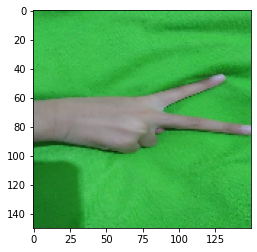

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')